## **ASSIGNMENT-4: TEXT AND SEQUENCE**

**GROUP:7**

**Ritika Kalyani**

**Akhil Seliveri**

### **Importing all the required Libraries**

In [29]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re


###**1.Training the model from scratch**

In [33]:
embedding_layer = Embedding(1000, 64)
words_len = 10000
maxlen = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=words_len)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))# adding classifier
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2,
                    )

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_14 (Flatten)        (None, 1200)              0         
                                                                 
 dense_20 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
625/625 [==============================] - 8s 12ms/step - loss: 0.5996 - acc: 0.6901 - val_loss: 0.4263 - val_acc: 0.8262
Epoch 2/15
625/625 [==============================] - 3s 6ms/step - loss: 0.3346 - acc: 0.8665 - val_loss: 0.3243 - val_acc: 0.8632
Epoch 3/15
625

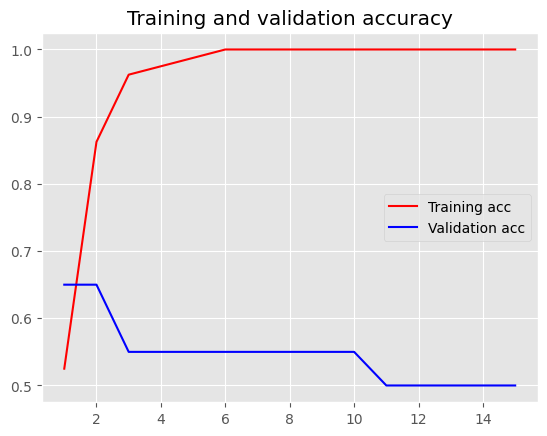

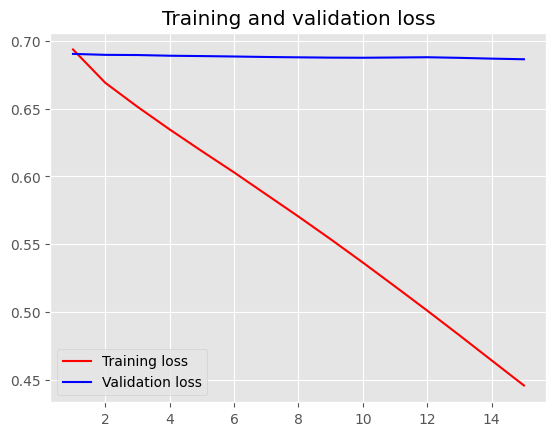

In [37]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "r-", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r-", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 3ms/step - loss: 0.4254 - acc: 0.8551
Test loss: 0.42540237307548523
Test accuracy: 0.8550800085067749


###**2.Training the model on 100 samples**

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_15 (Flatten)        (None, 1200)              0         
                                                                 
 dense_21 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
3/3 [==============================] - 1s 166ms/step - loss: 0.6937 - acc: 0.5250 - val_loss: 0.6904 - val_acc: 0.6500
Epoch 2/15
3/3 [==============================] - 0s 37ms/step - loss: 0.6691 - acc: 0.8625 - val_loss: 0.6897 - val_acc: 0.6500
Epoch 3/15
3/3 [====

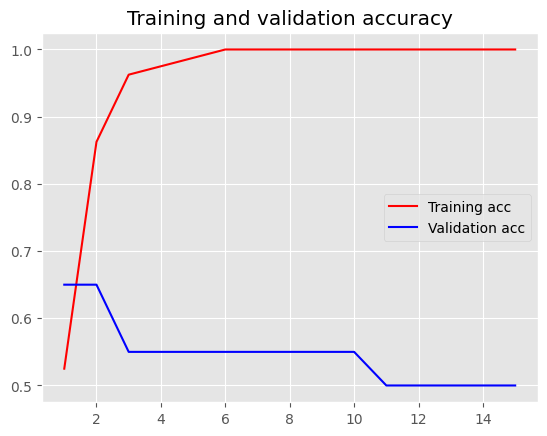

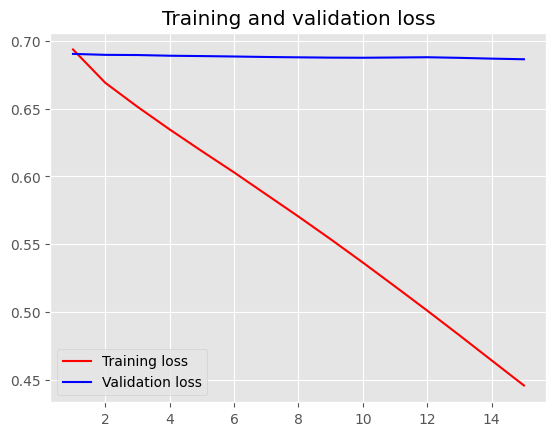

782/782 [==============================] - 2s 3ms/step - loss: 0.6955 - acc: 0.4987
Test loss: 0.6954607963562012
Test accuracy: 0.4986799955368042


In [36]:
embedding_layer = Embedding(1000, 64)
words_len = 10000
maxlen = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=words_len)


x_train = x_train[:100]
y_train = y_train[:100]

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "r-", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r-", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

**On the basic model from scratch with 100 samples we see that the accuracy is 49% and the loss is 0.69 which is good for the sample size of 100.Let's increase the size of the sample and see the results.**

### **3.Training the model on 6000 samples**



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_16 (Flatten)        (None, 1200)              0         
                                                                 
 dense_22 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
150/150 [==============================] - 2s 8ms/step - loss: 0.6922 - acc: 0.5142 - val_loss: 0.6912 - val_acc: 0.5375
Epoch 2/15
150/150 [==============================] - 1s 6ms/step - loss: 0.6598 - acc: 0.7560 - val_loss: 0.6590 - val_acc: 0.6492
Epoch 3/15
150/

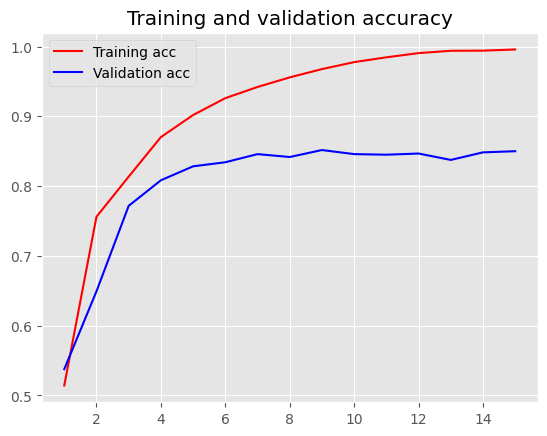

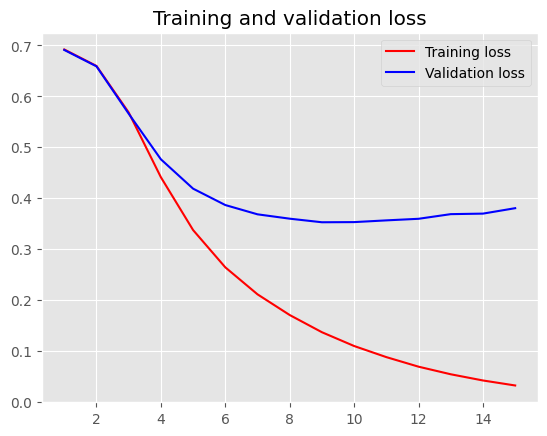

782/782 [==============================] - 2s 3ms/step - loss: 0.3848 - acc: 0.8393
Test loss: 0.38483941555023193
Test accuracy: 0.8392800092697144


In [38]:
embedding_layer = Embedding(1000, 64)

words_len = 10000
maxlen = 150


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=words_len)

x_train = x_train[:6000]
y_train = y_train[:6000]
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "r-", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r-", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

**Now,on the set with 6000 samples the accuracy has improved to 83% and the loss is decreased to 0.38 which means the model is improving.Let's increase the model's sample size again.**

### **4.Training the data on 12000 samples**

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_18 (Flatten)        (None, 1200)              0         
                                                                 
 dense_24 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
300/300 [==============================] - 2s 4ms/step - loss: 0.6815 - acc: 0.5929 - val_loss: 0.6376 - val_acc: 0.7467
Epoch 2/15
300/300 [==============================] - 1s 4ms/step - loss: 0.5222 - acc: 0.8075 - val_loss: 0.4364 - val_acc: 0.8258
Epoch 3/15
300/

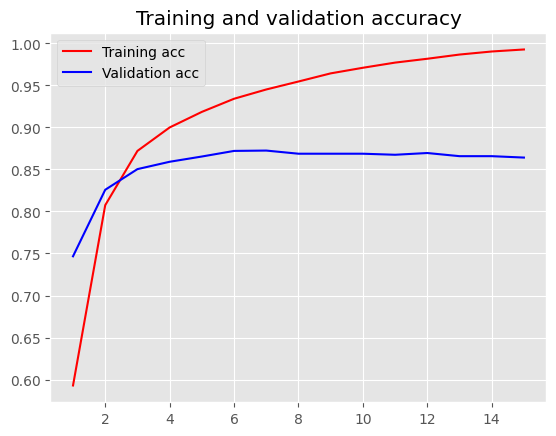

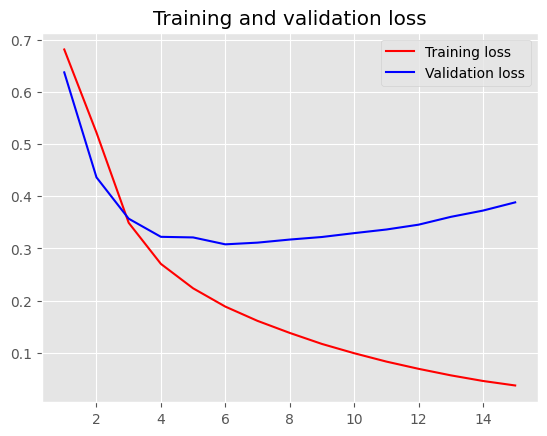

782/782 [==============================] - 3s 3ms/step - loss: 0.3964 - acc: 0.8547
Test loss: 0.396391361951828
Test accuracy: 0.8546800017356873


In [40]:
embedding_layer = Embedding(1000, 64)
words_len = 10000
maxlen = 150

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=words_len)

x_train = x_train[:12000]
y_train = y_train[:12000]

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "r-", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r-", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

**Now, by increasing the sample size by 12000, the accuracy has improved to 85% and test loss is the same as 0.39.So, we observe that as the sample size increases, the model starts performing better.**

###**Using pre-trained word embeddings**

In [41]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  3528k      0  0:00:23  0:00:23 --:--:-- 2904k


In [42]:
import os
import shutil

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

print('Number of Samples', len(texts))

Number of Samples 25000


**If there is insufficient training data to learn word embeddings beside the problem you want to address, you can use pre-trained word embeddings.**

**Individual training reviews are collected into a list of strings, one for each review, and the review labels (positive/negative) are collected into a labels list.**

###**Data Tokenization**

### **1.Training on 100 sample size**

In [43]:
maxlen = 150 # cuts off review after 150 words
training_samples = 100 # Trains on 100 samples
validation_samples = 10000 # Validates on 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens:" % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]


Found 88582 unique tokens:
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


###**Downloading and Preprocessing the GloVe word embedding**

In [45]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'
glove_zip = requests.get(glove_url)

with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


**After that, an embedding matrix that is able to being inserted into an embedding layer is required. The matrix's shape must be (max words, embedding dim), which equals a 10000 by 100 matrix. The GloVe is 100 times 400000.**

###**Preparing the GloVe word embeddings matrix**

In [57]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # The Words that are not found in the embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector


In [58]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_38 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_20 (Flatten)        (None, 15000)             0         
                                                                 
 dense_34 (Dense)            (None, 32)                480032    
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

**Adding pre-trained word embedding to the Embeddig layer. Setting this to "False" ensures that the Embedding layer cannot be trained when called. If you set trainable to True, the optimization algorithm will be able to change the word embedding settings. It is beneficial not to update pretrained portions while they are still being trained to prevent them from forgetting what they already "know".**

In [60]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/15
375/375 [==============================] - 4s 10ms/step - loss: 0.7280 - acc: 0.4991 - val_loss: 0.6932 - val_acc: 0.5006
Epoch 2/15
375/375 [==============================] - 5s 14ms/step - loss: 0.6968 - acc: 0.5002 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 3/15
375/375 [==============================] - 6s 16ms/step - loss: 0.6934 - acc: 0.5083 - val_loss: 0.6947 - val_acc: 0.4988
Epoch 4/15
375/375 [==============================] - 6s 17ms/step - loss: 0.6911 - acc: 0.5197 - val_loss: 0.6991 - val_acc: 0.4999
Epoch 5/15
375/375 [==============================] - 6s 16ms/step - loss: 0.6752 - acc: 0.5439 - val_loss: 0.7092 - val_acc: 0.4948
Epoch 6/15
375/375 [==============================] - 4s 10ms/step - loss: 0.6466 - acc: 0.5831 - val_loss: 0.7165 - val_acc: 0.4978
Epoch 7/15
375/375 [==============================] - 4s 11ms/step - loss: 0.6114 - acc: 0.6212 - val_loss: 0.7720 - val_acc: 0.4970
Epoch 8/15
375/375 [==============================] - 6s 16ms/step - 

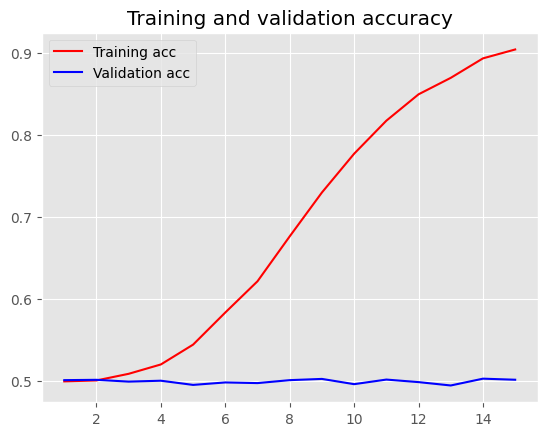

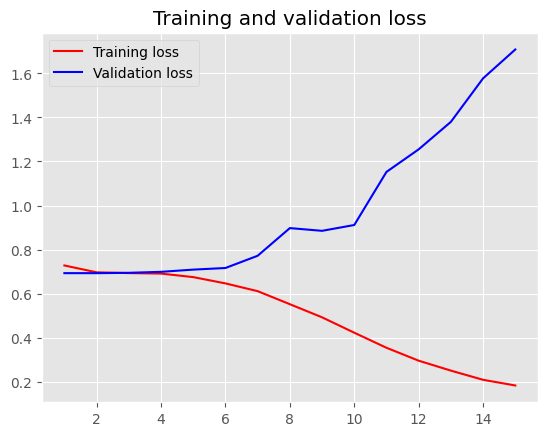

782/782 [==============================] - 3s 4ms/step - loss: 1.7317 - acc: 0.4993
Test loss: 1.7317168712615967
Test accuracy: 0.49932000041007996


In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r-', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

**The model with training samples 100 and pretrained model gives accuracy of 0.49 which is less and loss as 1.73 which is more. Let's increase the sample size and see the results.**

### **2.Training on sample size 0f 6000**

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_41 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_23 (Flatten)        (None, 15000)             0         
                                                                 
 dense_40 (Dense)            (None, 32)                480032    
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
188/188 [==============================] -

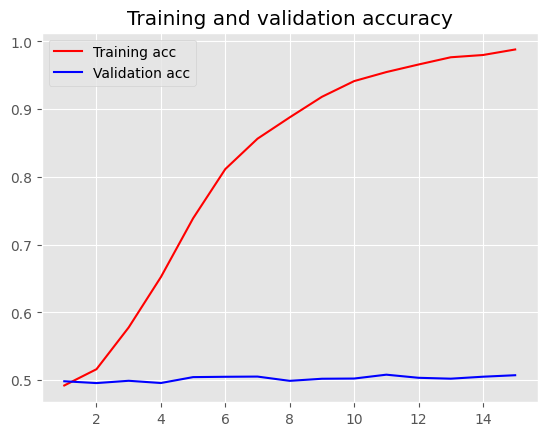

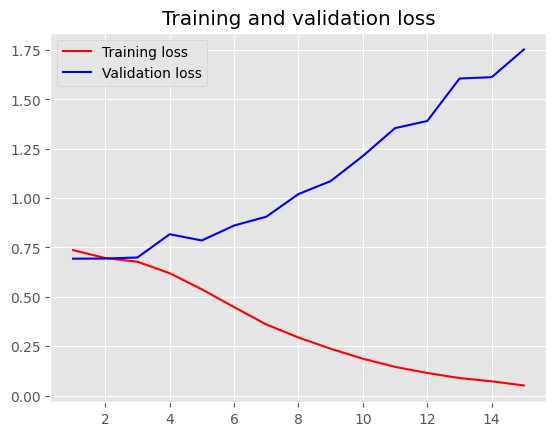

782/782 [==============================] - 3s 4ms/step - loss: 1.7302 - acc: 0.4996
Test loss: 1.7301568984985352
Test accuracy: 0.49959999322891235


In [64]:
maxlen = 150
training_samples = 6000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r-', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

**The model with training samples 6000 and pretrained model gives accuracy of 0.49 which is similar to previous model and loss as 1.73,suggesting that there were no appreciable increases even after increasing the training sample size by double. This gives further support to the idea that performance gains from expanding the training sample size might not always be significant. Let's increase the sample size furthermore and see the results**

### **3.Training on 12000 sample size**

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_42 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_24 (Flatten)        (None, 15000)             0         
                                                                 
 dense_42 (Dense)            (None, 32)                480032    
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
375/375 [==============================] -

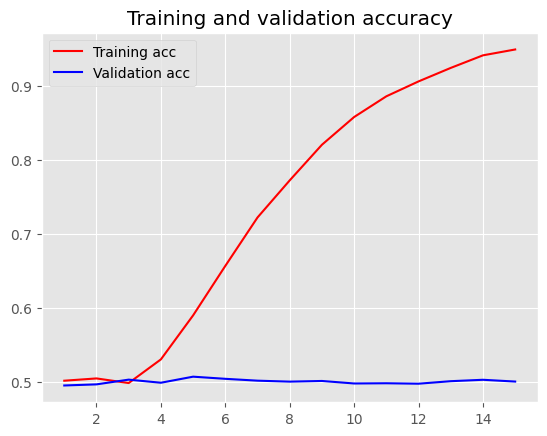

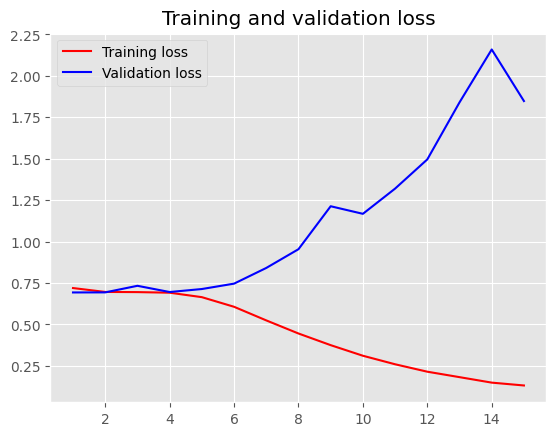

782/782 [==============================] - 3s 3ms/step - loss: 1.8419 - acc: 0.5056
Test loss: 1.8418707847595215
Test accuracy: 0.5056399703025818


In [65]:
maxlen = 150
training_samples = 12000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])

np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r-', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

**The model with training samples 12000 and pretrained model gives accuracy of 0.50 which is little higher than previous model and loss as 1.84 which is more.We see no or little change in the accuracy and the loss increases,suggesting that increasing the number of training samples may not have a significant effect on enhancing model performance. Furthermore, the rise in loss indicates that the model may be overfitting or noise in the new data is causing it to become less reliable at generating predictions.**